## Pandas plotting functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import datetime
from datetime import datetime, date

In [4]:
# Set formattign options
# pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 120)

In [5]:
# read data -formatting Date col as Date

In [6]:
data = pd.read_csv("prices10.csv",parse_dates=['Date'])
data[:5]

,Date,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,2007-01-03,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
1,2007-01-04,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2,2007-01-05,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
3,2007-01-08,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
4,2007-01-09,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


In [7]:
# remove column Date -save it to Date_col

In [8]:
Date_col = data.pop('Date')

In [9]:
data[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
1,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
3,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
4,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


In [10]:
Date_col[:5]

0   2007-01-03
1   2007-01-04
2   2007-01-05
3   2007-01-08
4   2007-01-09
Name: Date, dtype: datetime64[ns]

In [13]:
# keep a copy

In [14]:
close_px = data.copy()

In [15]:
close_px.index = Date_col
close_px[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-03,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
2007-01-04,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2007-01-05,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
2007-01-08,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
2007-01-09,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


# Plotting time-series prices

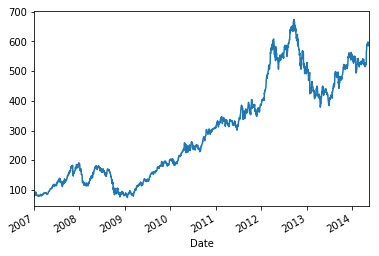

In [16]:
# plot prices of AAPL
close_px.AAPL.plot()

In [17]:
# or

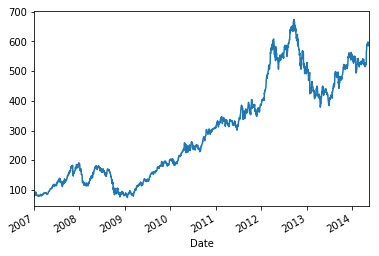

In [18]:
close_px['AAPL'].plot()

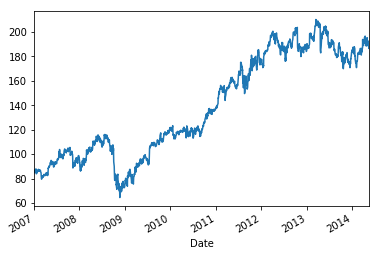

In [19]:
# plot closing prices of IBM
close_px['IBM'].plot()

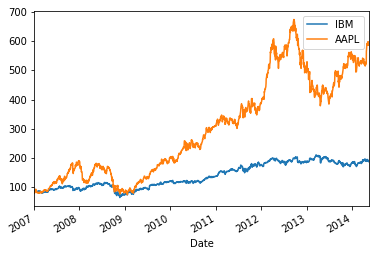

In [20]:
# plot IBM, AAPL on the same chart
close_px[['IBM', 'AAPL']].plot()

In [21]:
# plot all prices

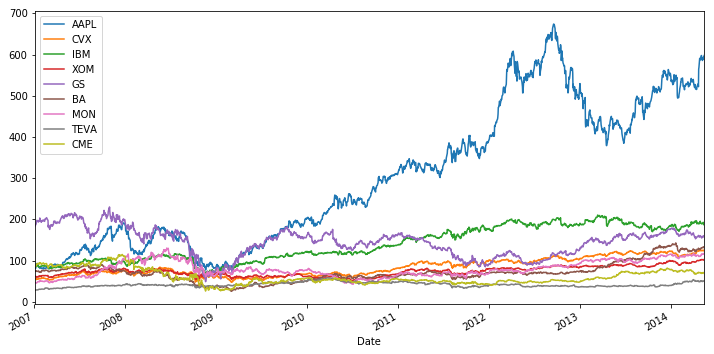

In [22]:
close_px.plot(figsize=(12,6))

In [23]:
# 2007 prices are different

### Daily changes

In [24]:
net_returns = data / data.shift(1) - 1
net_returns[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
3,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
4,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825


In [ ]:
# add dates to net_returns

In [25]:
daily_pc = net_returns.copy()       # keep a copy

In [26]:
daily_pc.index = Date_col

In [242]:
# remove 1st row?  Actually its not needed

In [26]:
# daily_pc.drop(daily_pc.index[:1], inplace=True)
# daily_pc[:5]

In [ ]:
# plot daily changes

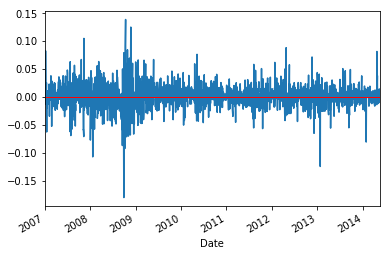

In [27]:
daily_pc["AAPL"].plot()
plt.axhline(linewidth=1, color='r')

# daily cumulative returns

In [28]:
gross_returns = (1 + net_returns).cumprod()
gross_returns[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.022222,0.990267,1.010697,0.981356,0.990650,1.004026,0.982666,1.012132,1.007268
2,1.014856,0.994052,1.001528,0.988267,0.991677,0.999732,0.991012,1.030147,1.012034
3,1.019850,1.006849,1.016810,0.980392,1.014971,0.997316,0.977958,1.051838,1.022757
4,1.104619,0.995133,1.028800,0.972838,1.016700,0.986849,0.971325,1.049632,1.028714


In [30]:
daily_cr = gross_returns.copy()

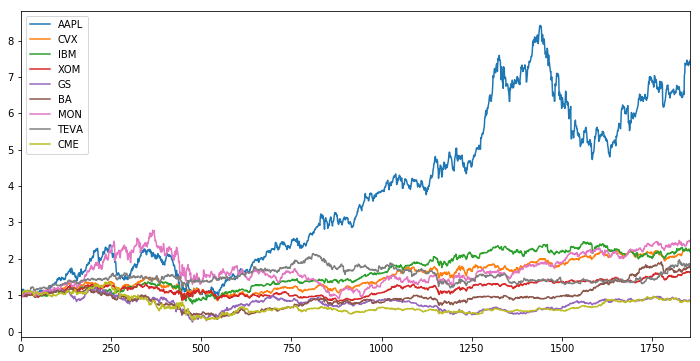

In [31]:
daily_cr.plot(figsize=(12,6))
plt.legend(loc=2)

In [32]:
# compare with

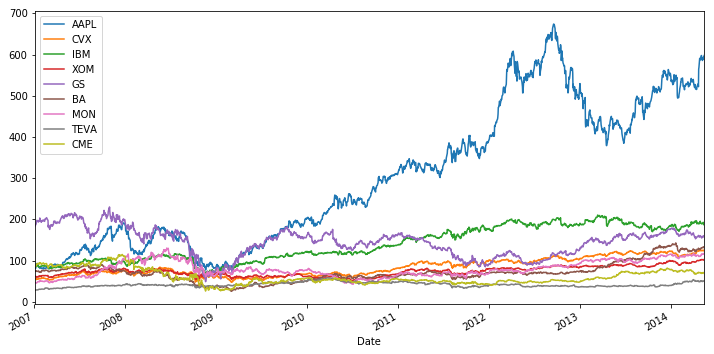

In [33]:
close_px.plot(figsize=(12,6))

# monthly data

In [252]:
# end-of-month prices

In [51]:
monthly = close_px.asfreq('M')
monthly[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,81.94,56.97,86.72,62.22,195.90,74.84,49.81,30.54,90.40
2007-02-28,80.87,53.95,81.53,60.44,186.29,73.20,47.66,31.02,86.53
2007-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30,95.39,61.25,89.66,66.93,202.18,78.02,53.46,33.41,83.06
2007-05-31,115.84,64.63,93.88,70.43,213.47,84.70,55.82,34.28,85.35


In [52]:
# NaN values

In [53]:
# forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,81.94,56.97,86.72,62.22,195.90,74.84,49.81,30.54,90.40
2007-02-28,80.87,53.95,81.53,60.44,186.29,73.20,47.66,31.02,86.53
2007-03-31,80.87,53.95,81.53,60.44,186.29,73.20,47.66,31.02,86.53
2007-04-30,95.39,61.25,89.66,66.93,202.18,78.02,53.46,33.41,83.06
2007-05-31,115.84,64.63,93.88,70.43,213.47,84.70,55.82,34.28,85.35


In [54]:
# remove Date
# Date_col = monthly.pop('Date')

In [55]:
# monthly price changes

In [56]:
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,-0.013058,-0.053010,-0.059848,-0.028608,-0.049056,-0.021913,-0.043164,0.015717,-0.042810
2007-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-04-30,0.179547,0.135310,0.099718,0.107379,0.085297,0.065847,0.121695,0.077047,-0.040102
2007-05-31,0.214383,0.055184,0.047067,0.052293,0.055841,0.085619,0.044145,0.026040,0.027570


In [57]:
# temp = monthly_pc.copy()

In [58]:
monthly_pc[:1] = 0.0
monthly_pc[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-28,-0.013058,-0.053010,-0.059848,-0.028608,-0.049056,-0.021913,-0.043164,0.015717,-0.042810
2007-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-04-30,0.179547,0.135310,0.099718,0.107379,0.085297,0.065847,0.121695,0.077047,-0.040102
2007-05-31,0.214383,0.055184,0.047067,0.052293,0.055841,0.085619,0.044145,0.026040,0.027570


In [59]:
# monthly cumulative returns

In [60]:
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-02-28,0.986942,0.946990,0.940152,0.971392,0.950944,0.978087,0.956836,1.015717,0.957190
2007-03-31,0.986942,0.946990,0.940152,0.971392,0.950944,0.978087,0.956836,1.015717,0.957190
2007-04-30,1.164144,1.075127,1.033902,1.075699,1.032057,1.042491,1.073278,1.093975,0.918805
2007-05-31,1.413717,1.134457,1.082565,1.131951,1.089689,1.131748,1.120659,1.122462,0.944137


In [ ]:
# plot the monthly cumulative returns

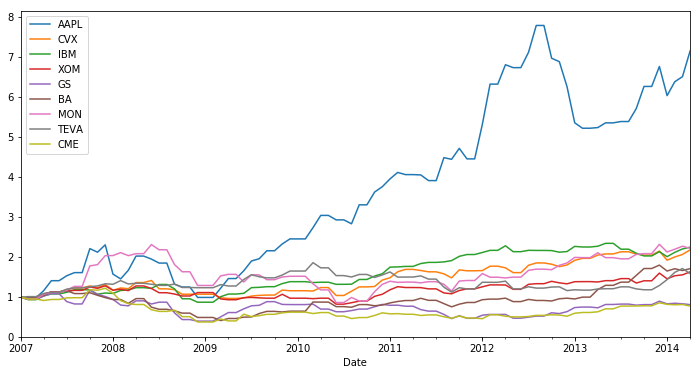

In [62]:
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2)

In [ ]:
# like daily_cr.plot() but with smooth

# Distribution of net_returns

In [ ]:
# histogram of AAPL daily net returns

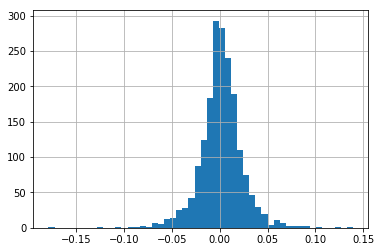

In [63]:
aapl = daily_pc['AAPL']
aapl.hist(bins=50)

In [64]:
import seaborn as sns

In [72]:
net_returns[1:]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
1,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
3,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
4,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825
5,0.047807,-0.017207,-0.011769,-0.015364,0.019775,0.014414,-0.007050,0.002452,0.028608
...,...,...,...,...,...,...,...,...,...
1851,0.012450,0.001694,0.013100,0.002746,0.014949,0.011442,0.002680,0.014925,0.018968
1852,0.001569,0.004832,-0.001973,0.001272,0.004575,0.006410,0.008106,0.024376,-0.004513
1853,0.000185,0.004568,-0.018055,-0.000684,-0.005178,-0.003447,0.000770,-0.013176,-0.011050
1854,-0.008504,-0.012286,-0.011975,-0.014762,-0.017623,-0.013384,-0.013675,-0.009167,-0.004727


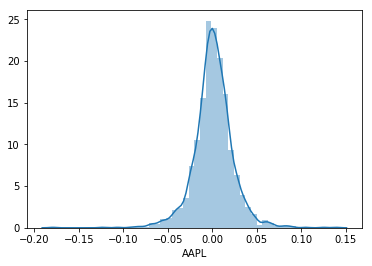

In [74]:
sns.distplot(net_returns.AAPL[1:])

In [75]:
# normal density fit is default

## scatterplot matrix of all stocks daily changes

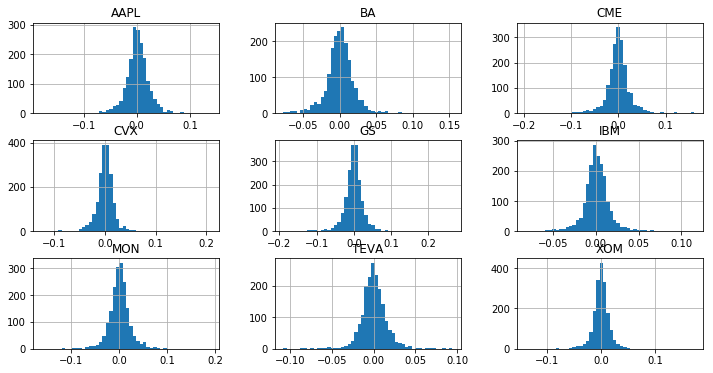

In [78]:
daily_pc.hist(bins=50, figsize=(12,6));

In [ ]:
# Cannot compare histogram spread since the x-axis scaling is different

# Moving averages

In [ ]:
# AAPL prices

In [81]:
close_px.AAPL

Date
2007-01-03     80.10
2007-01-04     81.88
2007-01-05     81.29
2007-01-08     81.69
2007-01-09     88.48
               ...  
2014-05-12    592.83
2014-05-13    593.76
2014-05-14    593.87
2014-05-15    588.82
2014-05-16    597.51
Name: AAPL, Length: 1856, dtype: float64

In [84]:
aapl_close = close_px.AAPL

In [85]:
# 30-day moving average

In [86]:
ma_30 = aapl_close.rolling(window=30).mean()

In [93]:
ma_30[:5]

Date
2007-01-03   NaN
2007-01-04   NaN
2007-01-05   NaN
2007-01-08   NaN
2007-01-09   NaN
Name: AAPL, dtype: float64

In [92]:
ma_30.isna().sum()

29

In [91]:
ma_30[25:32]

Date
2007-02-08          NaN
2007-02-09          NaN
2007-02-12          NaN
2007-02-13          NaN
2007-02-14    83.655667
2007-02-15    83.700667
2007-02-16    83.674000
Name: AAPL, dtype: float64

In [94]:
# 90-day moving average
ma_90 = aapl_close.rolling(window=90).mean()

In [ ]:
# a dataframe with prices and moving averages

In [95]:
result = pd.DataFrame({'Price': aapl_close,'30 days': ma_30, '90 days': ma_90})

In [ ]:
# AAPL prices and moving averages

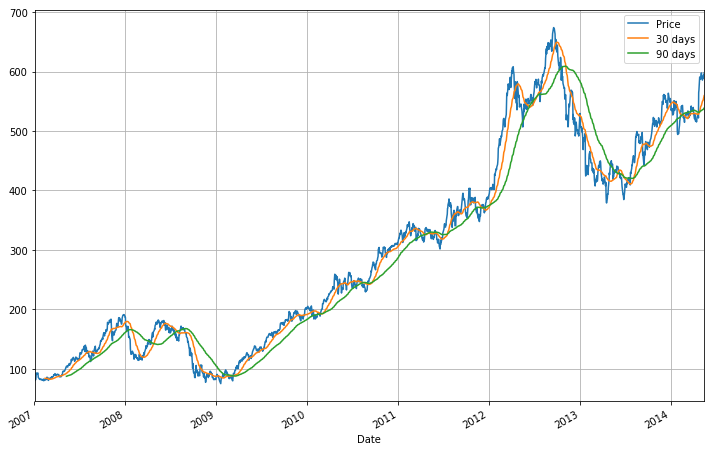

In [99]:
result.plot(figsize=(12,8))
plt.grid()

In [ ]:
# 30-day moving average is closer to prices

In [ ]:
# 90-day moving average is more smooth than 30-day m.a.

# Comparison of average daily returns across stocks

In [ ]:
# scatterplot of price changes of IBM vs AAPL

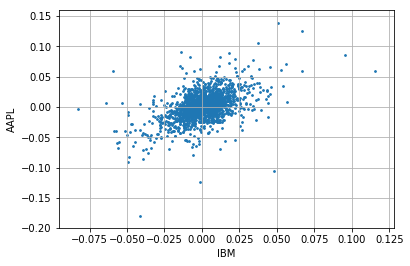

In [109]:
plt.scatter(daily_pc['IBM'], daily_pc['AAPL'],s=3)
plt.xlabel('IBM')
plt.ylabel('AAPL')
plt.grid()

In [ ]:
# sns adds a regression line

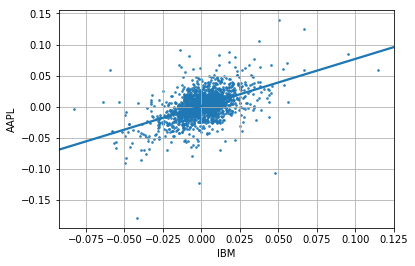

In [101]:
sns.regplot('IBM','AAPL',daily_pc,scatter_kws={'s':3},ci=None)
plt.grid()

In [111]:
# scatterplot for ALL stocks returns

In [102]:
from pandas.plotting import scatter_matrix

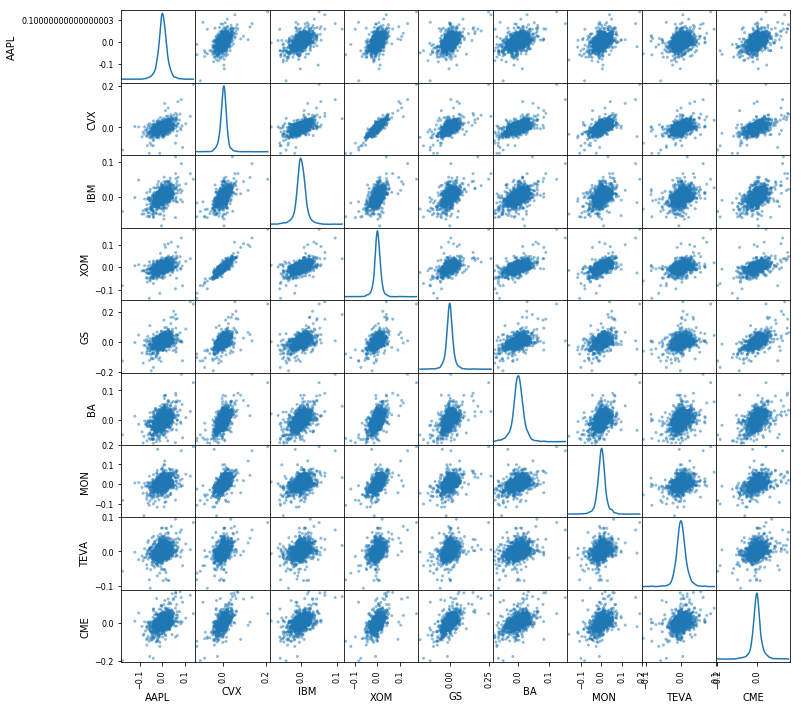

In [113]:
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

In [ ]:
# CVX, XOM highly linearly related

In [ ]:
# MON, TEVA not linearly related

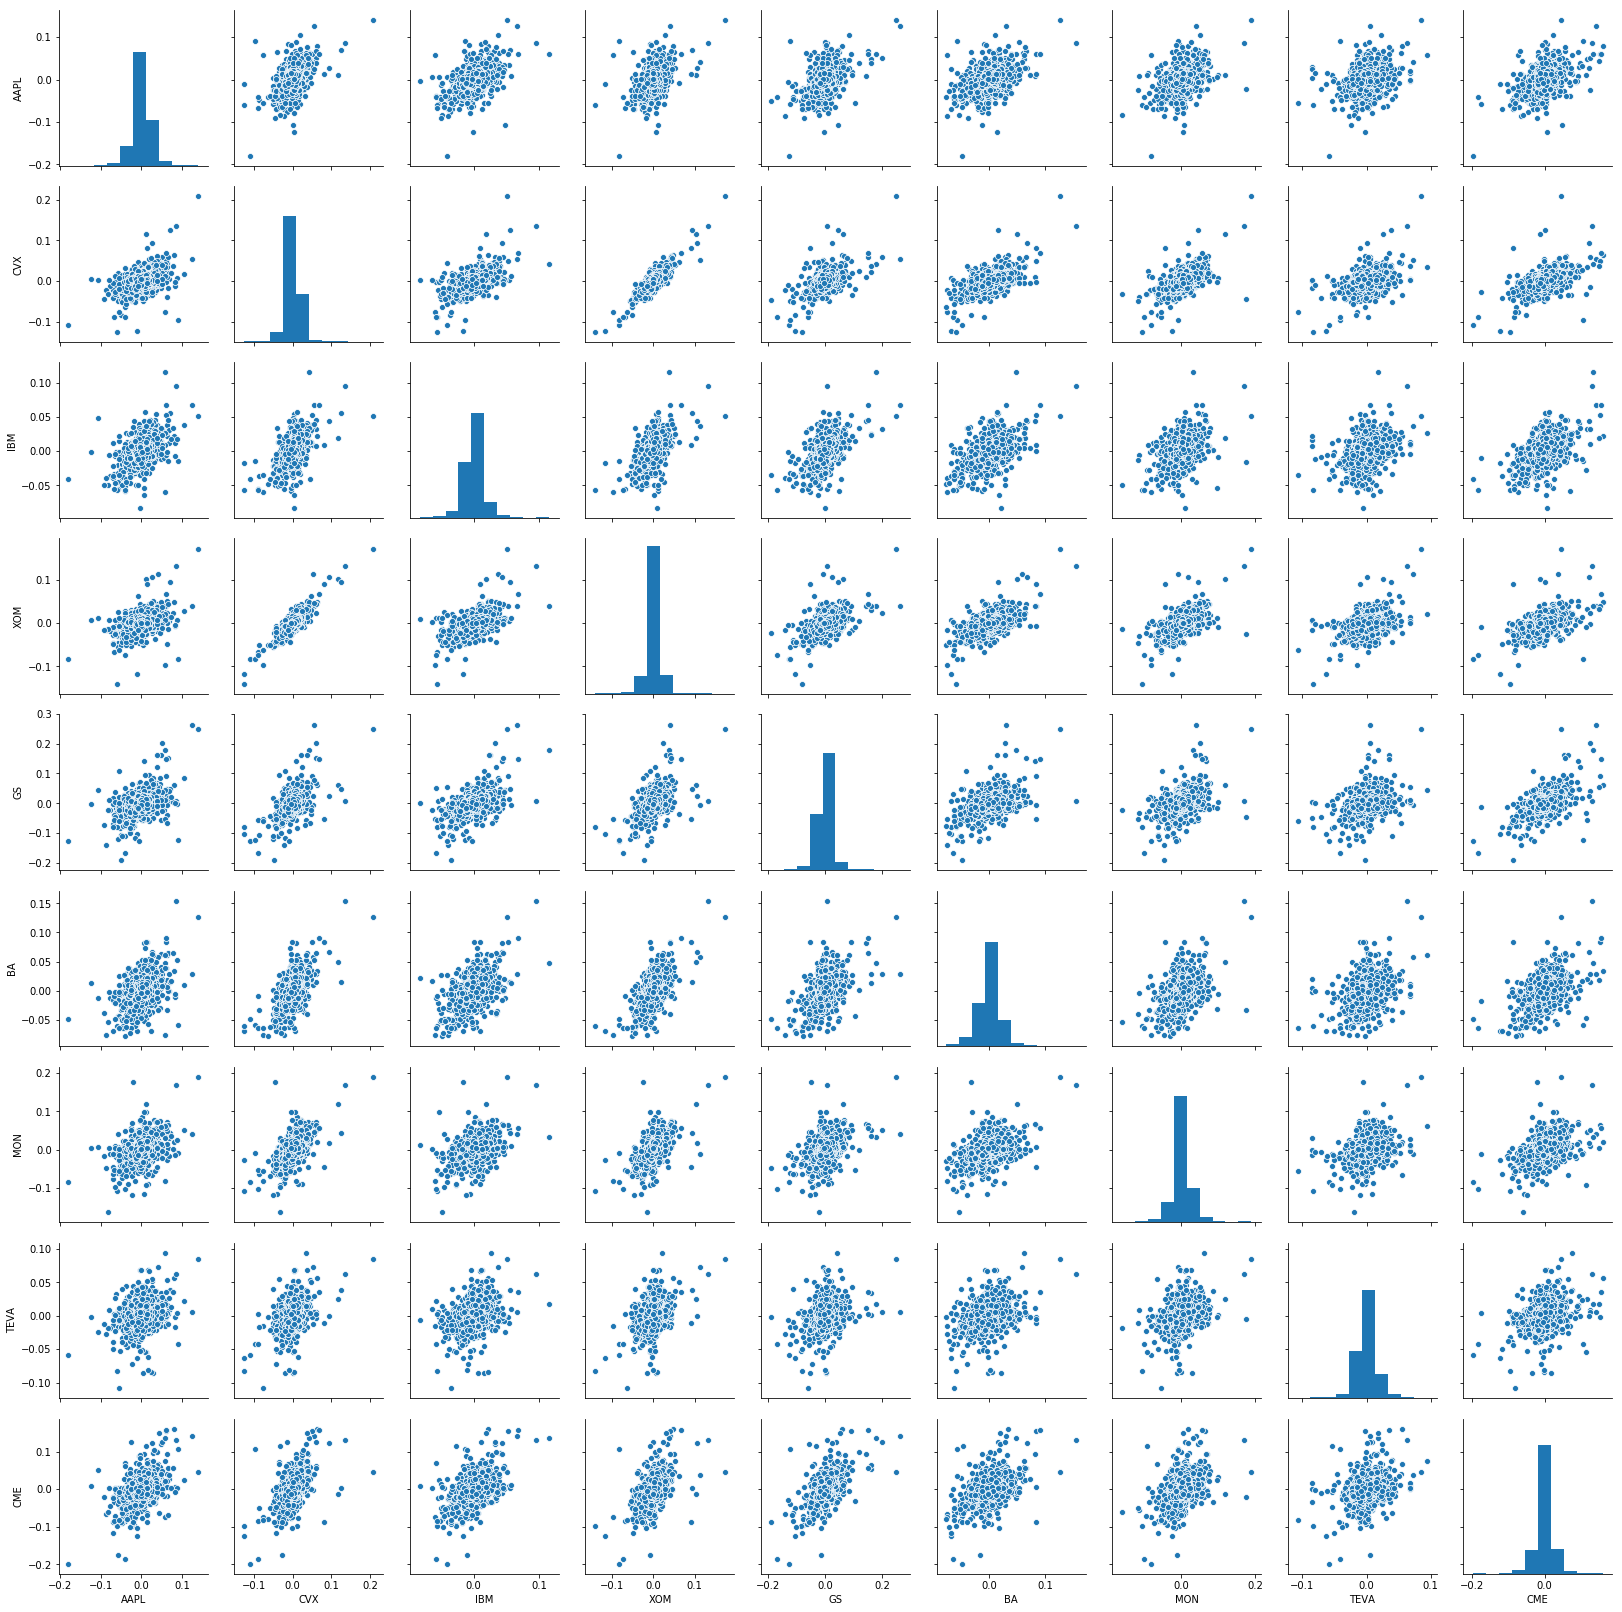

In [106]:
sns.pairplot(daily_pc[1:], diag_kind ='hist')

# Correlation of stocks returns

In [107]:
corrs = daily_pc.corr()
corrs

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
AAPL,1.000000,0.456904,0.498518,0.417021,0.443807,0.423143,0.378089,0.280000,0.438877
CVX,0.456904,1.000000,0.578675,0.891391,0.556398,0.600954,0.572509,0.421710,0.519904
IBM,0.498518,0.578675,1.000000,0.567176,0.523900,0.521691,0.420960,0.322133,0.490826
XOM,0.417021,0.891391,0.567176,1.000000,0.512322,0.597151,0.561446,0.410500,0.504945
GS,0.443807,0.556398,0.523900,0.512322,1.000000,0.495586,0.437285,0.314322,0.585788
BA,0.423143,0.600954,0.521691,0.597151,0.495586,1.000000,0.450401,0.347635,0.473719
MON,0.378089,0.572509,0.420960,0.561446,0.437285,0.450401,1.000000,0.316466,0.433014
TEVA,0.280000,0.421710,0.322133,0.410500,0.314322,0.347635,0.316466,1.000000,0.323164
CME,0.438877,0.519904,0.490826,0.504945,0.585788,0.473719,0.433014,0.323164,1.000000


In [ ]:
# cor(CVX,XOM) is 0.89

In [120]:
corrs.values.min()

0.27999997186012904

In [121]:
# smallest corr from TEVA and AAPL

# Heatmap

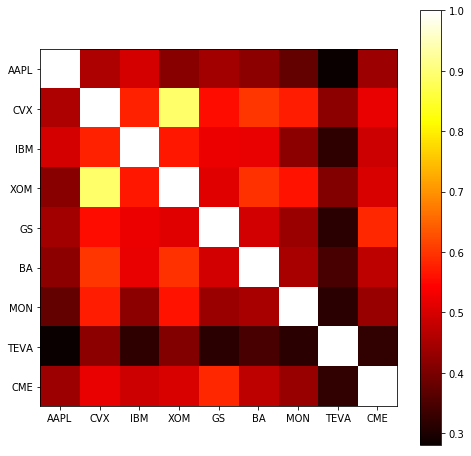

In [111]:
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

In [125]:
# 75 period minimum
min_periods = 75

In [ ]:
# 75-day moving average of standard deviation

In [126]:
vol = daily_pc.rolling(window=min_periods).std()*np.sqrt(min_periods)

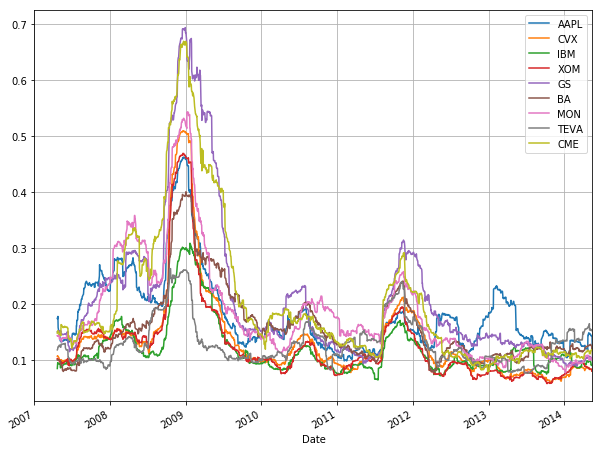

In [127]:
# plot
vol.plot(figsize=(10, 8));
plt.grid()

In [ ]:
# plot expected returns vs sigma

In [ ]:
values = daily_pc

In [142]:
values[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2007-01-05,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
2007-01-08,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
2007-01-09,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825


In [147]:
df1 = pd.DataFrame([values.std(),values.mean()])

In [149]:
df1

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,0.022421,0.018282,0.014743,0.016942,0.028434,0.019591,0.023791,0.015721,0.027333
1,0.001336,0.000596,0.000533,0.000403,0.000309,0.000495,0.000773,0.000450,0.000266


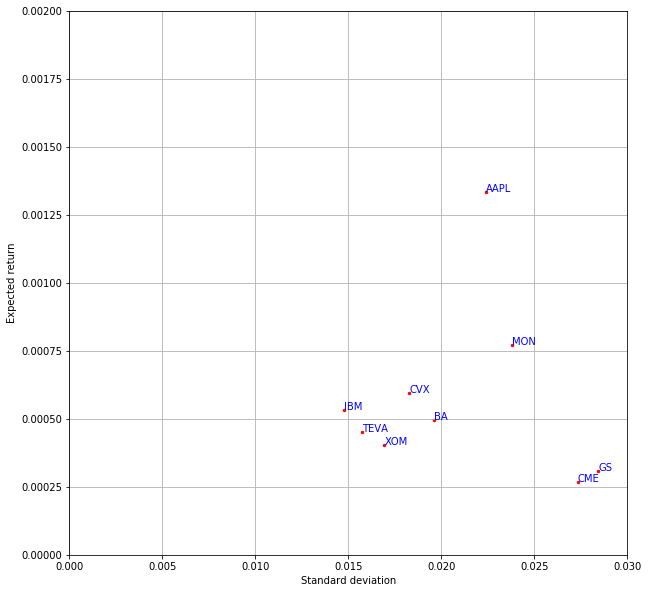

In [162]:
plt.scatter(values.std(), values.mean(),s=6,color='r')
plt.ylabel('Expected return')
plt.xlabel('Standard deviation')

for ticker, x, y in zip(values.columns, values.std(), values.mean()):
    plt.annotate(ticker, xy = (x,y), color = 'b' )

plt.ylim(0.000, 0.002)
plt.xlim(0.0, 0.030)

# plot size
plt.gcf().set_size_inches(10,10)
plt.grid()

In [ ]:
# AAPL high return moderate risk

In [ ]:
# IBM moderate risk with moderate return

In [ ]:
# AAPL dominates MON, CME, GS